In [9]:
import polars as pl
import pandas as pd
from plotnine import *

In [11]:
file = 'https://raw.githubusercontent.com/usefulmove/code/refs/heads/main/pinguino/pinguino.parquet'

data_raw = pl.read_parquet(file)

data = (
    data_raw
    .drop('Unnamed: 0', 'rowid')
    .filter(
        pl.col('bill_length_mm').is_not_null(),
        pl.col('bill_depth_mm').is_not_null(),
        pl.col('flipper_length_mm').is_not_null(),
        pl.col('body_mass_g').is_not_null(),

    )
)

data

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
str,str,f64,f64,f64,f64,str,i64
"""Adelie""","""Torgersen""",39.1,18.7,181.0,3750.0,"""male""",2007
"""Adelie""","""Torgersen""",39.5,17.4,186.0,3800.0,"""female""",2007
"""Adelie""","""Torgersen""",40.3,18.0,195.0,3250.0,"""female""",2007
"""Adelie""","""Torgersen""",36.7,19.3,193.0,3450.0,"""female""",2007
"""Adelie""","""Torgersen""",39.3,20.6,190.0,3650.0,"""male""",2007
…,…,…,…,…,…,…,…
"""Chinstrap""","""Dream""",55.8,19.8,207.0,4000.0,"""male""",2009
"""Chinstrap""","""Dream""",43.5,18.1,202.0,3400.0,"""female""",2009
"""Chinstrap""","""Dream""",49.6,18.2,193.0,3775.0,"""male""",2009


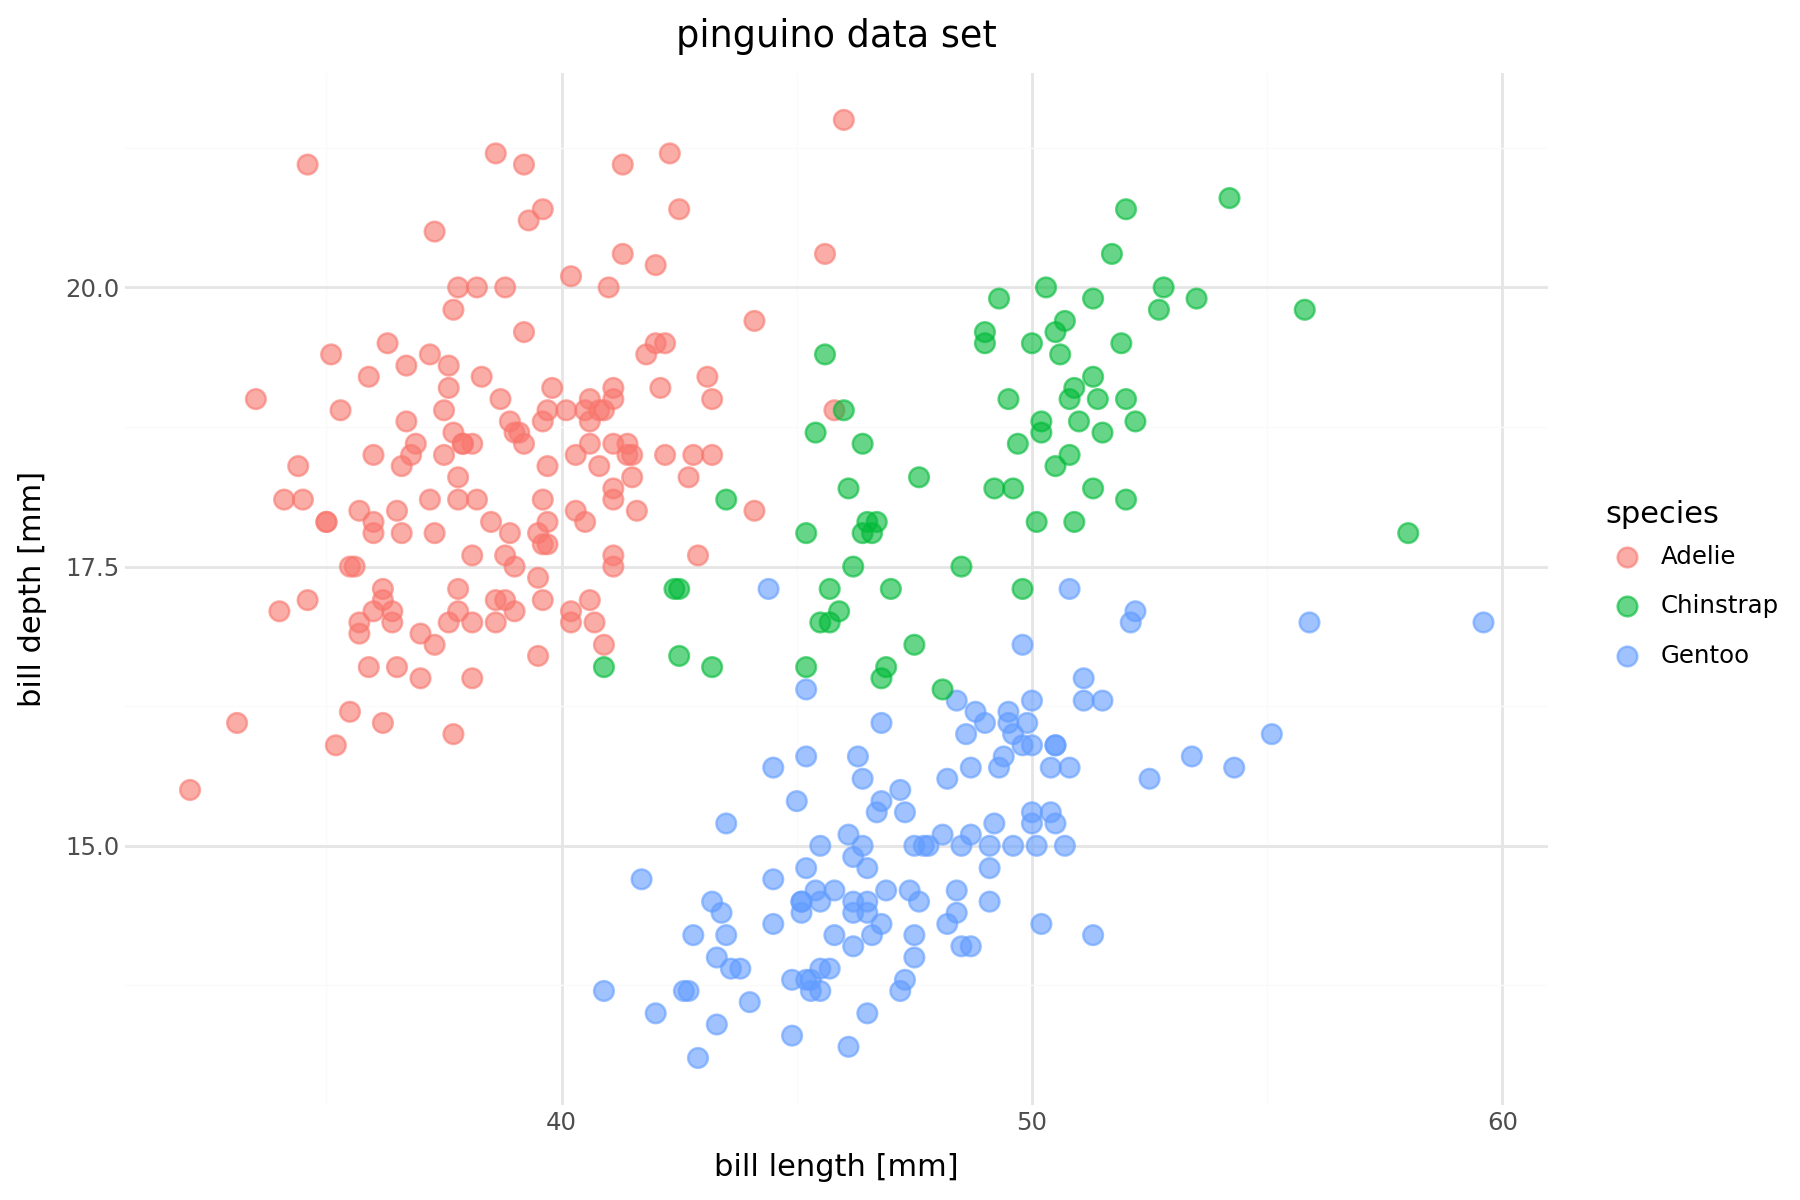

In [4]:
(
    ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm'))
    + geom_point(aes(color='species'), size=3.5, alpha=0.6)
    + labs(
        title='pinguino data set',
        x='bill length [mm]',
        y='bill depth [mm]'
    )
    + theme_minimal()
    + theme(figure_size=(9,6))
)